In [1]:
import netCDF4 as nc
import numpy as np
import scipy
import os
import matplotlib
# matplotlib.rcParams['backend'] = "Qt4Agg"
# matplotlib.rcParams['legend.numpoints'] = 1

from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LogNorm
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.lines as mlines

import matplotlib.gridspec as gridspec

# WT
import scipy.io as sio

In [2]:
import seaborn as sns
# sns.set_style('white')

In [3]:
## load function definitions

execfile('extract_T_irr.py')
execfile('calc_irr_diff.py')
execfile('calc_irr_impact_regr.py')
execfile('calc_irr_impact_thres.py')

In [4]:
#################################
#User-specified options
#################################

temp_product_CRU = "tmx_max"
temp_product_CESM = "TREFHTMX"

response = "PC/PD"
t_res = "seasonal"

seas_ind = 2
month_ind = 5

yr_start1 = 1901
yr_end1 = 1930
yr_start2 = 1981
yr_end2 = 2010

thres_irr_PD = 0.02

p_value = 0.01
figsave = True
figformat = 'pdf' ##'pdf'
#################################

SREX_region = 'SAS'

# Load data

In [5]:
#Calculate df_irr
_,_,f_irr_CRU = calc_irr_diff('CRU_CESM',response,yr_start1,yr_end1,yr_start2,yr_end2)
_,_,f_irr_CESM = calc_irr_diff('CESM',response,yr_start1,yr_end1,yr_start2,yr_end2)



/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: Mean of empty slice
/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


In [6]:
#from ispinb_mask.ipynb
#Load mask from .mat file
mat_contents = sio.loadmat('mw_ispinb.mat') #Add path before filename if mw_ispinb.mat is not in current dir.
ispinb = mat_contents['ispinb'][::-1,:] #'::-1' flips the 1st axis

#Generate tuple of arrays with x- and y-indices to be used to select relevant indices from 2D-array, to be used in your script instead of the SAS indices
pinb_mask = np.where(ispinb==1)

# Execute algorithm

### bb = 5

Go to code in calc_irr_impact_regr.py and change bl to 2 on line 40.

In [7]:
# Re-load regression-based algorithm after this change
execfile('calc_irr_impact_regr.py')

In [8]:
###################################
#
#Calculate dT_irr
#Execute the algorithm to calculate
#dT_irr globally and regionally.
#
#N.B. this procedure fills the 
#bottom two panels of the plot.
#
###################################

#Define stacked array in which the results are stored
CRU_t = np.zeros((9, 192, 288))
CESM_t = np.zeros((9, 192, 288))

#Execute the algorithm for different threshold values for CRU and CESM
CRU_t[0,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.0,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[1,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.1,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[2,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.2,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[3,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.3,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[4,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.4,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[5,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.5,False,yr_start1,yr_end1,yr_start2,yr_end2)

CESM_t[0,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.0,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[1,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.1,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[2,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.2,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[3,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.3,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[4,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.4,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[5,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.5,False,yr_start1,yr_end1,yr_start2,yr_end2)


# WT:  save arrays as .mat files for making maps in matlab
#sio.savemat('formatlab_CRU_t.mat' , {'CRU_t':CRU_t})
#sio.savemat('formatlab_CESM_t.mat', {'CESM_t':CESM_t})
# WT


#Change to 1D, remove NaNs
CRU0 = CRU_t[0,:,:].ravel()[~np.isnan(CRU_t[0,:,:].ravel())]
CRU1 = CRU_t[1,:,:].ravel()[~np.isnan(CRU_t[1,:,:].ravel())]
CRU2 = CRU_t[2,:,:].ravel()[~np.isnan(CRU_t[2,:,:].ravel())]
CRU3 = CRU_t[3,:,:].ravel()[~np.isnan(CRU_t[3,:,:].ravel())]
CRU4 = CRU_t[4,:,:].ravel()[~np.isnan(CRU_t[4,:,:].ravel())]
CRU5 = CRU_t[5,:,:].ravel()[~np.isnan(CRU_t[5,:,:].ravel())]

CESM0 = CESM_t[0,:,:].ravel()[~np.isnan(CESM_t[0,:,:].ravel())]
CESM1 = CESM_t[1,:,:].ravel()[~np.isnan(CESM_t[1,:,:].ravel())]
CESM2 = CESM_t[2,:,:].ravel()[~np.isnan(CESM_t[2,:,:].ravel())]
CESM3 = CESM_t[3,:,:].ravel()[~np.isnan(CESM_t[3,:,:].ravel())]
CESM4 = CESM_t[4,:,:].ravel()[~np.isnan(CESM_t[4,:,:].ravel())]
CESM5 = CESM_t[5,:,:].ravel()[~np.isnan(CESM_t[5,:,:].ravel())]

/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: Mean of empty slice
/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction


In [9]:
# WT replaced sel by pinb_mask in next lines
#Extract the PINB signal for each threshold for CRU and CESM, removing NaN values 
CRU0_reg_pinb_bb5 = CRU_t[0,:,:][pinb_mask][~np.isnan(CRU_t[0,:,:][pinb_mask])]
CRU1_reg_pinb_bb5 = CRU_t[1,:,:][pinb_mask][~np.isnan(CRU_t[1,:,:][pinb_mask])]
CRU2_reg_pinb_bb5 = CRU_t[2,:,:][pinb_mask][~np.isnan(CRU_t[2,:,:][pinb_mask])]
CRU3_reg_pinb_bb5 = CRU_t[3,:,:][pinb_mask][~np.isnan(CRU_t[3,:,:][pinb_mask])]
CRU4_reg_pinb_bb5 = CRU_t[4,:,:][pinb_mask][~np.isnan(CRU_t[4,:,:][pinb_mask])]
CRU5_reg_pinb_bb5 = CRU_t[5,:,:][pinb_mask][~np.isnan(CRU_t[5,:,:][pinb_mask])]

# WT replaced mistake (CRU_t to CESM_t)
CESM0_reg_pinb_bb5 = CESM_t[0,:,:][pinb_mask][~np.isnan(CESM_t[0,:,:][pinb_mask])]
CESM1_reg_pinb_bb5 = CESM_t[1,:,:][pinb_mask][~np.isnan(CESM_t[1,:,:][pinb_mask])]
CESM2_reg_pinb_bb5 = CESM_t[2,:,:][pinb_mask][~np.isnan(CESM_t[2,:,:][pinb_mask])]
CESM3_reg_pinb_bb5 = CESM_t[3,:,:][pinb_mask][~np.isnan(CESM_t[3,:,:][pinb_mask])]
CESM4_reg_pinb_bb5 = CESM_t[4,:,:][pinb_mask][~np.isnan(CESM_t[4,:,:][pinb_mask])]
CESM5_reg_pinb_bb5 = CESM_t[5,:,:][pinb_mask][~np.isnan(CESM_t[5,:,:][pinb_mask])]

In [10]:
CRU_bb5 = np.zeros((6))
CESM_bb5 = np.zeros((6))
    
CRU_bb5[0] = np.nanmedian(CRU0_reg_pinb_bb5)
CRU_bb5[1] = np.nanmedian(CRU1_reg_pinb_bb5)
CRU_bb5[2] = np.nanmedian(CRU2_reg_pinb_bb5)
CRU_bb5[3] = np.nanmedian(CRU3_reg_pinb_bb5)
CRU_bb5[4] = np.nanmedian(CRU4_reg_pinb_bb5)
CRU_bb5[5] = np.nanmedian(CRU5_reg_pinb_bb5)

CESM_bb5[0] = np.nanmedian(CESM0_reg_pinb_bb5)
CESM_bb5[1] = np.nanmedian(CESM1_reg_pinb_bb5)
CESM_bb5[2] = np.nanmedian(CESM2_reg_pinb_bb5)
CESM_bb5[3] = np.nanmedian(CESM3_reg_pinb_bb5)
CESM_bb5[4] = np.nanmedian(CESM4_reg_pinb_bb5)
CESM_bb5[5] = np.nanmedian(CESM5_reg_pinb_bb5)

### bb = 7

Go to code in calc_irr_impact_regr.py and change bl to 3 on line 40.

In [49]:
# Re-load regression-based algorithm after this change
execfile('calc_irr_impact_regr.py')

In [50]:
###################################
#
#Calculate dT_irr
#Execute the algorithm to calculate
#dT_irr globally and regionally.
#
#N.B. this procedure fills the 
#bottom two panels of the plot.
#
###################################

#Define stacked array in which the results are stored
CRU_t = np.zeros((9, 192, 288))
CESM_t = np.zeros((9, 192, 288))

#Execute the algorithm for different threshold values for CRU and CESM
CRU_t[0,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.0,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[1,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.1,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[2,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.2,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[3,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.3,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[4,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.4,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[5,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.5,False,yr_start1,yr_end1,yr_start2,yr_end2)

CESM_t[0,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.0,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[1,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.1,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[2,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.2,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[3,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.3,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[4,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.4,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[5,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.5,False,yr_start1,yr_end1,yr_start2,yr_end2)


# WT:  save arrays as .mat files for making maps in matlab
#sio.savemat('formatlab_CRU_t.mat' , {'CRU_t':CRU_t})
#sio.savemat('formatlab_CESM_t.mat', {'CESM_t':CESM_t})
# WT


#Change to 1D, remove NaNs
CRU0 = CRU_t[0,:,:].ravel()[~np.isnan(CRU_t[0,:,:].ravel())]
CRU1 = CRU_t[1,:,:].ravel()[~np.isnan(CRU_t[1,:,:].ravel())]
CRU2 = CRU_t[2,:,:].ravel()[~np.isnan(CRU_t[2,:,:].ravel())]
CRU3 = CRU_t[3,:,:].ravel()[~np.isnan(CRU_t[3,:,:].ravel())]
CRU4 = CRU_t[4,:,:].ravel()[~np.isnan(CRU_t[4,:,:].ravel())]
CRU5 = CRU_t[5,:,:].ravel()[~np.isnan(CRU_t[5,:,:].ravel())]

CESM0 = CESM_t[0,:,:].ravel()[~np.isnan(CESM_t[0,:,:].ravel())]
CESM1 = CESM_t[1,:,:].ravel()[~np.isnan(CESM_t[1,:,:].ravel())]
CESM2 = CESM_t[2,:,:].ravel()[~np.isnan(CESM_t[2,:,:].ravel())]
CESM3 = CESM_t[3,:,:].ravel()[~np.isnan(CESM_t[3,:,:].ravel())]
CESM4 = CESM_t[4,:,:].ravel()[~np.isnan(CESM_t[4,:,:].ravel())]
CESM5 = CESM_t[5,:,:].ravel()[~np.isnan(CESM_t[5,:,:].ravel())]

/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: Mean of empty slice
/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction


In [51]:
# WT replaced sel by pinb_mask in next lines
#Extract the PINB signal for each threshold for CRU and CESM, removing NaN values 
CRU0_reg_pinb_bb7 = CRU_t[0,:,:][pinb_mask][~np.isnan(CRU_t[0,:,:][pinb_mask])]
CRU1_reg_pinb_bb7 = CRU_t[1,:,:][pinb_mask][~np.isnan(CRU_t[1,:,:][pinb_mask])]
CRU2_reg_pinb_bb7 = CRU_t[2,:,:][pinb_mask][~np.isnan(CRU_t[2,:,:][pinb_mask])]
CRU3_reg_pinb_bb7 = CRU_t[3,:,:][pinb_mask][~np.isnan(CRU_t[3,:,:][pinb_mask])]
CRU4_reg_pinb_bb7 = CRU_t[4,:,:][pinb_mask][~np.isnan(CRU_t[4,:,:][pinb_mask])]
CRU5_reg_pinb_bb7 = CRU_t[5,:,:][pinb_mask][~np.isnan(CRU_t[5,:,:][pinb_mask])]

# WT replaced mistake (CRU_t to CESM_t)
CESM0_reg_pinb_bb7 = CESM_t[0,:,:][pinb_mask][~np.isnan(CESM_t[0,:,:][pinb_mask])]
CESM1_reg_pinb_bb7 = CESM_t[1,:,:][pinb_mask][~np.isnan(CESM_t[1,:,:][pinb_mask])]
CESM2_reg_pinb_bb7 = CESM_t[2,:,:][pinb_mask][~np.isnan(CESM_t[2,:,:][pinb_mask])]
CESM3_reg_pinb_bb7 = CESM_t[3,:,:][pinb_mask][~np.isnan(CESM_t[3,:,:][pinb_mask])]
CESM4_reg_pinb_bb7 = CESM_t[4,:,:][pinb_mask][~np.isnan(CESM_t[4,:,:][pinb_mask])]
CESM5_reg_pinb_bb7 = CESM_t[5,:,:][pinb_mask][~np.isnan(CESM_t[5,:,:][pinb_mask])]

In [52]:
CRU_bb7 = np.zeros((6))
CESM_bb7 = np.zeros((6))
    
CRU_bb7[0] = np.nanmedian(CRU0_reg_pinb_bb7)
CRU_bb7[1] = np.nanmedian(CRU1_reg_pinb_bb7)
CRU_bb7[2] = np.nanmedian(CRU2_reg_pinb_bb7)
CRU_bb7[3] = np.nanmedian(CRU3_reg_pinb_bb7)
CRU_bb7[4] = np.nanmedian(CRU4_reg_pinb_bb7)
CRU_bb7[5] = np.nanmedian(CRU5_reg_pinb_bb7)

CESM_bb7[0] = np.nanmedian(CESM0_reg_pinb_bb7)
CESM_bb7[1] = np.nanmedian(CESM1_reg_pinb_bb7)
CESM_bb7[2] = np.nanmedian(CESM2_reg_pinb_bb7)
CESM_bb7[3] = np.nanmedian(CESM3_reg_pinb_bb7)
CESM_bb7[4] = np.nanmedian(CESM4_reg_pinb_bb7)
CESM_bb7[5] = np.nanmedian(CESM5_reg_pinb_bb7)

### bb = 9

Go to code in calc_irr_impact_regr.py and change bl to 4 on line 40.

In [15]:
# Re-load regression-based algorithm after this change
execfile('calc_irr_impact_regr.py')

In [16]:
###################################
#
#Calculate dT_irr
#Execute the algorithm to calculate
#dT_irr globally and regionally.
#
#N.B. this procedure fills the 
#bottom two panels of the plot.
#
###################################

#Define stacked array in which the results are stored
CRU_t = np.zeros((9, 192, 288))
CESM_t = np.zeros((9, 192, 288))

#Execute the algorithm for different threshold values for CRU and CESM
CRU_t[0,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.0,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[1,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.1,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[2,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.2,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[3,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.3,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[4,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.4,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[5,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.5,False,yr_start1,yr_end1,yr_start2,yr_end2)

CESM_t[0,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.0,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[1,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.1,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[2,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.2,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[3,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.3,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[4,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.4,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[5,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.5,False,yr_start1,yr_end1,yr_start2,yr_end2)


# WT:  save arrays as .mat files for making maps in matlab
#sio.savemat('formatlab_CRU_t.mat' , {'CRU_t':CRU_t})
#sio.savemat('formatlab_CESM_t.mat', {'CESM_t':CESM_t})
# WT


#Change to 1D, remove NaNs
CRU0 = CRU_t[0,:,:].ravel()[~np.isnan(CRU_t[0,:,:].ravel())]
CRU1 = CRU_t[1,:,:].ravel()[~np.isnan(CRU_t[1,:,:].ravel())]
CRU2 = CRU_t[2,:,:].ravel()[~np.isnan(CRU_t[2,:,:].ravel())]
CRU3 = CRU_t[3,:,:].ravel()[~np.isnan(CRU_t[3,:,:].ravel())]
CRU4 = CRU_t[4,:,:].ravel()[~np.isnan(CRU_t[4,:,:].ravel())]
CRU5 = CRU_t[5,:,:].ravel()[~np.isnan(CRU_t[5,:,:].ravel())]

CESM0 = CESM_t[0,:,:].ravel()[~np.isnan(CESM_t[0,:,:].ravel())]
CESM1 = CESM_t[1,:,:].ravel()[~np.isnan(CESM_t[1,:,:].ravel())]
CESM2 = CESM_t[2,:,:].ravel()[~np.isnan(CESM_t[2,:,:].ravel())]
CESM3 = CESM_t[3,:,:].ravel()[~np.isnan(CESM_t[3,:,:].ravel())]
CESM4 = CESM_t[4,:,:].ravel()[~np.isnan(CESM_t[4,:,:].ravel())]
CESM5 = CESM_t[5,:,:].ravel()[~np.isnan(CESM_t[5,:,:].ravel())]

/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: Mean of empty slice
/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction


In [17]:
# WT replaced sel by pinb_mask in next lines
#Extract the PINB signal for each threshold for CRU and CESM, removing NaN values 
CRU0_reg_pinb_bb9 = CRU_t[0,:,:][pinb_mask][~np.isnan(CRU_t[0,:,:][pinb_mask])]
CRU1_reg_pinb_bb9 = CRU_t[1,:,:][pinb_mask][~np.isnan(CRU_t[1,:,:][pinb_mask])]
CRU2_reg_pinb_bb9 = CRU_t[2,:,:][pinb_mask][~np.isnan(CRU_t[2,:,:][pinb_mask])]
CRU3_reg_pinb_bb9 = CRU_t[3,:,:][pinb_mask][~np.isnan(CRU_t[3,:,:][pinb_mask])]
CRU4_reg_pinb_bb9 = CRU_t[4,:,:][pinb_mask][~np.isnan(CRU_t[4,:,:][pinb_mask])]
CRU5_reg_pinb_bb9 = CRU_t[5,:,:][pinb_mask][~np.isnan(CRU_t[5,:,:][pinb_mask])]

# WT replaced mistake (CRU_t to CESM_t)
CESM0_reg_pinb_bb9 = CESM_t[0,:,:][pinb_mask][~np.isnan(CESM_t[0,:,:][pinb_mask])]
CESM1_reg_pinb_bb9 = CESM_t[1,:,:][pinb_mask][~np.isnan(CESM_t[1,:,:][pinb_mask])]
CESM2_reg_pinb_bb9 = CESM_t[2,:,:][pinb_mask][~np.isnan(CESM_t[2,:,:][pinb_mask])]
CESM3_reg_pinb_bb9 = CESM_t[3,:,:][pinb_mask][~np.isnan(CESM_t[3,:,:][pinb_mask])]
CESM4_reg_pinb_bb9 = CESM_t[4,:,:][pinb_mask][~np.isnan(CESM_t[4,:,:][pinb_mask])]
CESM5_reg_pinb_bb9 = CESM_t[5,:,:][pinb_mask][~np.isnan(CESM_t[5,:,:][pinb_mask])]

In [18]:
CRU_bb9 = np.zeros((6))
CESM_bb9 = np.zeros((6))
    
CRU_bb9[0] = np.nanmedian(CRU0_reg_pinb_bb9)
CRU_bb9[1] = np.nanmedian(CRU1_reg_pinb_bb9)
CRU_bb9[2] = np.nanmedian(CRU2_reg_pinb_bb9)
CRU_bb9[3] = np.nanmedian(CRU3_reg_pinb_bb9)
CRU_bb9[4] = np.nanmedian(CRU4_reg_pinb_bb9)
CRU_bb9[5] = np.nanmedian(CRU5_reg_pinb_bb9)

CESM_bb9[0] = np.nanmedian(CESM0_reg_pinb_bb9)
CESM_bb9[1] = np.nanmedian(CESM1_reg_pinb_bb9)
CESM_bb9[2] = np.nanmedian(CESM2_reg_pinb_bb9)
CESM_bb9[3] = np.nanmedian(CESM3_reg_pinb_bb9)
CESM_bb9[4] = np.nanmedian(CESM4_reg_pinb_bb9)
CESM_bb9[5] = np.nanmedian(CESM5_reg_pinb_bb9)

### bb = 11

Go to code in calc_irr_impact_regr.py and change bl to 5 on line 40.

In [19]:
# Re-load regression-based algorithm after this change
execfile('calc_irr_impact_regr.py')

In [20]:
###################################
#
#Calculate dT_irr
#Execute the algorithm to calculate
#dT_irr globally and regionally.
#
#N.B. this procedure fills the 
#bottom two panels of the plot.
#
###################################

#Define stacked array in which the results are stored
CRU_t = np.zeros((9, 192, 288))
CESM_t = np.zeros((9, 192, 288))

#Execute the algorithm for different threshold values for CRU and CESM
CRU_t[0,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.0,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[1,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.1,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[2,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.2,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[3,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.3,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[4,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.4,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[5,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.5,False,yr_start1,yr_end1,yr_start2,yr_end2)

CESM_t[0,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.0,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[1,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.1,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[2,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.2,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[3,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.3,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[4,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.4,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[5,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.5,False,yr_start1,yr_end1,yr_start2,yr_end2)


# WT:  save arrays as .mat files for making maps in matlab
#sio.savemat('formatlab_CRU_t.mat' , {'CRU_t':CRU_t})
#sio.savemat('formatlab_CESM_t.mat', {'CESM_t':CESM_t})
# WT


#Change to 1D, remove NaNs
CRU0 = CRU_t[0,:,:].ravel()[~np.isnan(CRU_t[0,:,:].ravel())]
CRU1 = CRU_t[1,:,:].ravel()[~np.isnan(CRU_t[1,:,:].ravel())]
CRU2 = CRU_t[2,:,:].ravel()[~np.isnan(CRU_t[2,:,:].ravel())]
CRU3 = CRU_t[3,:,:].ravel()[~np.isnan(CRU_t[3,:,:].ravel())]
CRU4 = CRU_t[4,:,:].ravel()[~np.isnan(CRU_t[4,:,:].ravel())]
CRU5 = CRU_t[5,:,:].ravel()[~np.isnan(CRU_t[5,:,:].ravel())]

CESM0 = CESM_t[0,:,:].ravel()[~np.isnan(CESM_t[0,:,:].ravel())]
CESM1 = CESM_t[1,:,:].ravel()[~np.isnan(CESM_t[1,:,:].ravel())]
CESM2 = CESM_t[2,:,:].ravel()[~np.isnan(CESM_t[2,:,:].ravel())]
CESM3 = CESM_t[3,:,:].ravel()[~np.isnan(CESM_t[3,:,:].ravel())]
CESM4 = CESM_t[4,:,:].ravel()[~np.isnan(CESM_t[4,:,:].ravel())]
CESM5 = CESM_t[5,:,:].ravel()[~np.isnan(CESM_t[5,:,:].ravel())]

/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: Mean of empty slice
/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction


In [21]:
# WT replaced sel by pinb_mask in next lines
#Extract the PINB signal for each threshold for CRU and CESM, removing NaN values 
CRU0_reg_pinb_bb11 = CRU_t[0,:,:][pinb_mask][~np.isnan(CRU_t[0,:,:][pinb_mask])]
CRU1_reg_pinb_bb11 = CRU_t[1,:,:][pinb_mask][~np.isnan(CRU_t[1,:,:][pinb_mask])]
CRU2_reg_pinb_bb11 = CRU_t[2,:,:][pinb_mask][~np.isnan(CRU_t[2,:,:][pinb_mask])]
CRU3_reg_pinb_bb11 = CRU_t[3,:,:][pinb_mask][~np.isnan(CRU_t[3,:,:][pinb_mask])]
CRU4_reg_pinb_bb11 = CRU_t[4,:,:][pinb_mask][~np.isnan(CRU_t[4,:,:][pinb_mask])]
CRU5_reg_pinb_bb11 = CRU_t[5,:,:][pinb_mask][~np.isnan(CRU_t[5,:,:][pinb_mask])]

# WT replaced mistake (CRU_t to CESM_t)
CESM0_reg_pinb_bb11 = CESM_t[0,:,:][pinb_mask][~np.isnan(CESM_t[0,:,:][pinb_mask])]
CESM1_reg_pinb_bb11 = CESM_t[1,:,:][pinb_mask][~np.isnan(CESM_t[1,:,:][pinb_mask])]
CESM2_reg_pinb_bb11 = CESM_t[2,:,:][pinb_mask][~np.isnan(CESM_t[2,:,:][pinb_mask])]
CESM3_reg_pinb_bb11 = CESM_t[3,:,:][pinb_mask][~np.isnan(CESM_t[3,:,:][pinb_mask])]
CESM4_reg_pinb_bb11 = CESM_t[4,:,:][pinb_mask][~np.isnan(CESM_t[4,:,:][pinb_mask])]
CESM5_reg_pinb_bb11 = CESM_t[5,:,:][pinb_mask][~np.isnan(CESM_t[5,:,:][pinb_mask])]

In [22]:
CRU_bb11 = np.zeros((6))
CESM_bb11 = np.zeros((6))
    
CRU_bb11[0] = np.nanmedian(CRU0_reg_pinb_bb11)
CRU_bb11[1] = np.nanmedian(CRU1_reg_pinb_bb11)
CRU_bb11[2] = np.nanmedian(CRU2_reg_pinb_bb11)
CRU_bb11[3] = np.nanmedian(CRU3_reg_pinb_bb11)
CRU_bb11[4] = np.nanmedian(CRU4_reg_pinb_bb11)
CRU_bb11[5] = np.nanmedian(CRU5_reg_pinb_bb11)

CESM_bb11[0] = np.nanmedian(CESM0_reg_pinb_bb11)
CESM_bb11[1] = np.nanmedian(CESM1_reg_pinb_bb11)
CESM_bb11[2] = np.nanmedian(CESM2_reg_pinb_bb11)
CESM_bb11[3] = np.nanmedian(CESM3_reg_pinb_bb11)
CESM_bb11[4] = np.nanmedian(CESM4_reg_pinb_bb11)
CESM_bb11[5] = np.nanmedian(CESM5_reg_pinb_bb11)

### bb = 13

Go to code in calc_irr_impact_regr.py and change bl to 6 on line 40.

In [23]:
# Re-load regression-based algorithm after this change
execfile('calc_irr_impact_regr.py')

In [24]:
###################################
#
#Calculate dT_irr
#Execute the algorithm to calculate
#dT_irr globally and regionally.
#
#N.B. this procedure fills the 
#bottom two panels of the plot.
#
###################################

#Define stacked array in which the results are stored
CRU_t = np.zeros((9, 192, 288))
CESM_t = np.zeros((9, 192, 288))

#Execute the algorithm for different threshold values for CRU and CESM
CRU_t[0,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.0,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[1,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.1,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[2,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.2,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[3,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.3,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[4,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.4,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[5,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.5,False,yr_start1,yr_end1,yr_start2,yr_end2)

CESM_t[0,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.0,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[1,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.1,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[2,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.2,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[3,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.3,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[4,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.4,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[5,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.5,False,yr_start1,yr_end1,yr_start2,yr_end2)


# WT:  save arrays as .mat files for making maps in matlab
#sio.savemat('formatlab_CRU_t.mat' , {'CRU_t':CRU_t})
#sio.savemat('formatlab_CESM_t.mat', {'CESM_t':CESM_t})
# WT


#Change to 1D, remove NaNs
CRU0 = CRU_t[0,:,:].ravel()[~np.isnan(CRU_t[0,:,:].ravel())]
CRU1 = CRU_t[1,:,:].ravel()[~np.isnan(CRU_t[1,:,:].ravel())]
CRU2 = CRU_t[2,:,:].ravel()[~np.isnan(CRU_t[2,:,:].ravel())]
CRU3 = CRU_t[3,:,:].ravel()[~np.isnan(CRU_t[3,:,:].ravel())]
CRU4 = CRU_t[4,:,:].ravel()[~np.isnan(CRU_t[4,:,:].ravel())]
CRU5 = CRU_t[5,:,:].ravel()[~np.isnan(CRU_t[5,:,:].ravel())]

CESM0 = CESM_t[0,:,:].ravel()[~np.isnan(CESM_t[0,:,:].ravel())]
CESM1 = CESM_t[1,:,:].ravel()[~np.isnan(CESM_t[1,:,:].ravel())]
CESM2 = CESM_t[2,:,:].ravel()[~np.isnan(CESM_t[2,:,:].ravel())]
CESM3 = CESM_t[3,:,:].ravel()[~np.isnan(CESM_t[3,:,:].ravel())]
CESM4 = CESM_t[4,:,:].ravel()[~np.isnan(CESM_t[4,:,:].ravel())]
CESM5 = CESM_t[5,:,:].ravel()[~np.isnan(CESM_t[5,:,:].ravel())]

/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: Mean of empty slice
/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction


In [25]:
# WT replaced sel by pinb_mask in next lines
#Extract the PINB signal for each threshold for CRU and CESM, removing NaN values 
CRU0_reg_pinb_bb13 = CRU_t[0,:,:][pinb_mask][~np.isnan(CRU_t[0,:,:][pinb_mask])]
CRU1_reg_pinb_bb13 = CRU_t[1,:,:][pinb_mask][~np.isnan(CRU_t[1,:,:][pinb_mask])]
CRU2_reg_pinb_bb13 = CRU_t[2,:,:][pinb_mask][~np.isnan(CRU_t[2,:,:][pinb_mask])]
CRU3_reg_pinb_bb13 = CRU_t[3,:,:][pinb_mask][~np.isnan(CRU_t[3,:,:][pinb_mask])]
CRU4_reg_pinb_bb13 = CRU_t[4,:,:][pinb_mask][~np.isnan(CRU_t[4,:,:][pinb_mask])]
CRU5_reg_pinb_bb13 = CRU_t[5,:,:][pinb_mask][~np.isnan(CRU_t[5,:,:][pinb_mask])]

# WT replaced mistake (CRU_t to CESM_t)
CESM0_reg_pinb_bb13 = CESM_t[0,:,:][pinb_mask][~np.isnan(CESM_t[0,:,:][pinb_mask])]
CESM1_reg_pinb_bb13 = CESM_t[1,:,:][pinb_mask][~np.isnan(CESM_t[1,:,:][pinb_mask])]
CESM2_reg_pinb_bb13 = CESM_t[2,:,:][pinb_mask][~np.isnan(CESM_t[2,:,:][pinb_mask])]
CESM3_reg_pinb_bb13 = CESM_t[3,:,:][pinb_mask][~np.isnan(CESM_t[3,:,:][pinb_mask])]
CESM4_reg_pinb_bb13 = CESM_t[4,:,:][pinb_mask][~np.isnan(CESM_t[4,:,:][pinb_mask])]
CESM5_reg_pinb_bb13 = CESM_t[5,:,:][pinb_mask][~np.isnan(CESM_t[5,:,:][pinb_mask])]

In [26]:
CRU_bb13 = np.zeros((6))
CESM_bb13 = np.zeros((6))
    
CRU_bb13[0] = np.nanmedian(CRU0_reg_pinb_bb13)
CRU_bb13[1] = np.nanmedian(CRU1_reg_pinb_bb13)
CRU_bb13[2] = np.nanmedian(CRU2_reg_pinb_bb13)
CRU_bb13[3] = np.nanmedian(CRU3_reg_pinb_bb13)
CRU_bb13[4] = np.nanmedian(CRU4_reg_pinb_bb13)
CRU_bb13[5] = np.nanmedian(CRU5_reg_pinb_bb13)

CESM_bb13[0] = np.nanmedian(CESM0_reg_pinb_bb13)
CESM_bb13[1] = np.nanmedian(CESM1_reg_pinb_bb13)
CESM_bb13[2] = np.nanmedian(CESM2_reg_pinb_bb13)
CESM_bb13[3] = np.nanmedian(CESM3_reg_pinb_bb13)
CESM_bb13[4] = np.nanmedian(CESM4_reg_pinb_bb13)
CESM_bb13[5] = np.nanmedian(CESM5_reg_pinb_bb13)

### bb = 15

Go to code in calc_irr_impact_regr.py and change bl to 7 on line 40.

In [27]:
# Re-load regression-based algorithm after this change
execfile('calc_irr_impact_regr.py')

In [28]:
###################################
#
#Calculate dT_irr
#Execute the algorithm to calculate
#dT_irr globally and regionally.
#
#N.B. this procedure fills the 
#bottom two panels of the plot.
#
###################################

#Define stacked array in which the results are stored
CRU_t = np.zeros((9, 192, 288))
CESM_t = np.zeros((9, 192, 288))

#Execute the algorithm for different threshold values for CRU and CESM
CRU_t[0,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.0,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[1,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.1,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[2,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.2,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[3,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.3,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[4,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.4,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[5,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.5,False,yr_start1,yr_end1,yr_start2,yr_end2)

CESM_t[0,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.0,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[1,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.1,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[2,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.2,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[3,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.3,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[4,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.4,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[5,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.5,False,yr_start1,yr_end1,yr_start2,yr_end2)


# WT:  save arrays as .mat files for making maps in matlab
#sio.savemat('formatlab_CRU_t.mat' , {'CRU_t':CRU_t})
#sio.savemat('formatlab_CESM_t.mat', {'CESM_t':CESM_t})
# WT


#Change to 1D, remove NaNs
CRU0 = CRU_t[0,:,:].ravel()[~np.isnan(CRU_t[0,:,:].ravel())]
CRU1 = CRU_t[1,:,:].ravel()[~np.isnan(CRU_t[1,:,:].ravel())]
CRU2 = CRU_t[2,:,:].ravel()[~np.isnan(CRU_t[2,:,:].ravel())]
CRU3 = CRU_t[3,:,:].ravel()[~np.isnan(CRU_t[3,:,:].ravel())]
CRU4 = CRU_t[4,:,:].ravel()[~np.isnan(CRU_t[4,:,:].ravel())]
CRU5 = CRU_t[5,:,:].ravel()[~np.isnan(CRU_t[5,:,:].ravel())]

CESM0 = CESM_t[0,:,:].ravel()[~np.isnan(CESM_t[0,:,:].ravel())]
CESM1 = CESM_t[1,:,:].ravel()[~np.isnan(CESM_t[1,:,:].ravel())]
CESM2 = CESM_t[2,:,:].ravel()[~np.isnan(CESM_t[2,:,:].ravel())]
CESM3 = CESM_t[3,:,:].ravel()[~np.isnan(CESM_t[3,:,:].ravel())]
CESM4 = CESM_t[4,:,:].ravel()[~np.isnan(CESM_t[4,:,:].ravel())]
CESM5 = CESM_t[5,:,:].ravel()[~np.isnan(CESM_t[5,:,:].ravel())]

/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: Mean of empty slice
/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction


In [29]:
# WT replaced sel by pinb_mask in next lines
#Extract the PINB signal for each threshold for CRU and CESM, removing NaN values 
CRU0_reg_pinb_bb15 = CRU_t[0,:,:][pinb_mask][~np.isnan(CRU_t[0,:,:][pinb_mask])]
CRU1_reg_pinb_bb15 = CRU_t[1,:,:][pinb_mask][~np.isnan(CRU_t[1,:,:][pinb_mask])]
CRU2_reg_pinb_bb15 = CRU_t[2,:,:][pinb_mask][~np.isnan(CRU_t[2,:,:][pinb_mask])]
CRU3_reg_pinb_bb15 = CRU_t[3,:,:][pinb_mask][~np.isnan(CRU_t[3,:,:][pinb_mask])]
CRU4_reg_pinb_bb15 = CRU_t[4,:,:][pinb_mask][~np.isnan(CRU_t[4,:,:][pinb_mask])]
CRU5_reg_pinb_bb15 = CRU_t[5,:,:][pinb_mask][~np.isnan(CRU_t[5,:,:][pinb_mask])]

# WT replaced mistake (CRU_t to CESM_t)
CESM0_reg_pinb_bb15 = CESM_t[0,:,:][pinb_mask][~np.isnan(CESM_t[0,:,:][pinb_mask])]
CESM1_reg_pinb_bb15 = CESM_t[1,:,:][pinb_mask][~np.isnan(CESM_t[1,:,:][pinb_mask])]
CESM2_reg_pinb_bb15 = CESM_t[2,:,:][pinb_mask][~np.isnan(CESM_t[2,:,:][pinb_mask])]
CESM3_reg_pinb_bb15 = CESM_t[3,:,:][pinb_mask][~np.isnan(CESM_t[3,:,:][pinb_mask])]
CESM4_reg_pinb_bb15 = CESM_t[4,:,:][pinb_mask][~np.isnan(CESM_t[4,:,:][pinb_mask])]
CESM5_reg_pinb_bb15 = CESM_t[5,:,:][pinb_mask][~np.isnan(CESM_t[5,:,:][pinb_mask])]

In [30]:
CRU_bb15 = np.zeros((6))
CESM_bb15 = np.zeros((6))
    
CRU_bb15[0] = np.nanmedian(CRU0_reg_pinb_bb15)
CRU_bb15[1] = np.nanmedian(CRU1_reg_pinb_bb15)
CRU_bb15[2] = np.nanmedian(CRU2_reg_pinb_bb15)
CRU_bb15[3] = np.nanmedian(CRU3_reg_pinb_bb15)
CRU_bb15[4] = np.nanmedian(CRU4_reg_pinb_bb15)
CRU_bb15[5] = np.nanmedian(CRU5_reg_pinb_bb15)

CESM_bb15[0] = np.nanmedian(CESM0_reg_pinb_bb15)
CESM_bb15[1] = np.nanmedian(CESM1_reg_pinb_bb15)
CESM_bb15[2] = np.nanmedian(CESM2_reg_pinb_bb15)
CESM_bb15[3] = np.nanmedian(CESM3_reg_pinb_bb15)
CESM_bb15[4] = np.nanmedian(CESM4_reg_pinb_bb15)
CESM_bb15[5] = np.nanmedian(CESM5_reg_pinb_bb15)

# Plot results

In [53]:
arr_CRU = np.array((CRU_bb5,CRU_bb7,CRU_bb9,CRU_bb11,CRU_bb13,CRU_bb15))
arr_CESM = np.array((CESM_bb5,CESM_bb7,CESM_bb9,CESM_bb11,CESM_bb13,CESM_bb15))

print np.nanmin(arr_CRU), np.nanmax(arr_CRU)
print np.nanmin(arr_CESM), np.nanmax(arr_CESM)

-0.9185830868042288 -0.007202815444471358
-1.489693854952384 -0.13939366224860902


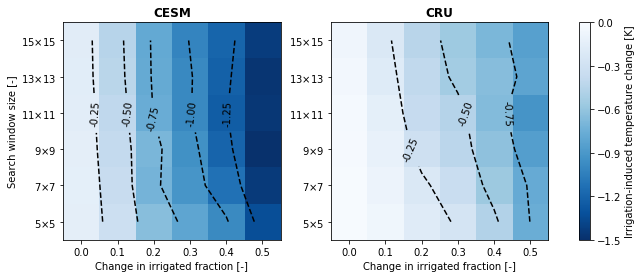

In [62]:
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2,figsize=(11,4))
#fig.set_size_inches(16 / 2.54, 16 / 2.54 / 2.2)

#CESM results
im_CESM = ax[0].imshow(arr_CESM,vmin=-1.5,vmax=0,cmap='Blues_r');
CS = ax[0].contour(arr_CESM, np.arange(-1.25,0,0.25), colors= 'k')
ax[0].clabel(CS, inline=1, fontsize=10, fmt='%1.2f')

ax[0].invert_yaxis()
ax[0].set_yticklabels(['',r'5$\times$5',r'7$\times$7',r'9$\times$9',r'11$\times$11',r'13$\times$13',r'15$\times$15'])
ax[0].set_xticklabels(['','0.0','0.1','0.2','0.3','0.4','0.5'])

ax[0].set_ylabel('Search window size [-]')
ax[0].set_xlabel(r'Change in irrigated fraction [-]')
#c.set_label('T change [K]')

ax[0].set_title('CESM',weight='bold')



#CRU results
im_CRU = ax[1].imshow(arr_CRU,vmin=-1.5,vmax=0,cmap='Blues_r');
CS = ax[1].contour(arr_CRU, np.arange(-1.25,0,0.25), colors= 'k')
ax[1].clabel(CS, inline=1, fontsize=10, fmt='%1.2f')

ax[1].set_yticklabels(['',r'5$\times$5',r'7$\times$7',r'9$\times$9',r'11$\times$11',r'13$\times$13',r'15$\times$15'])
ax[1].invert_yaxis()
ax[1].set_xticklabels(['','0.0','0.1','0.2','0.3','0.4','0.5'])

ax[1].set_xlabel(r'Change in irrigated fraction [-]')
#c.set_label('T change [K]')

ax[1].set_title('CRU',weight='bold')


c = fig.colorbar(im_CRU, ax=ax.ravel().tolist())
c.set_ticks(np.arange(-1.5,0.1,0.3))
c.set_label(u'Irrigation-induced temperature change [K]')

fig.savefig('CESM_CRUv3.22_heatmap_df-irr_swsize_AV.pdf',bbox_inches='tight')
fig.show()

**Stronger dependence of CRU on search window size compared to CESM**, displayed as a heat map of $\Delta TXm_{irr}$ as a function of change in irrigated fraction and the serach window size. Dashed lines represent the contour lines of equal $\Delta TXm_{irr}$.